In [5]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
path = "/store/user/ekoenig/MultiHiggs/DiHiggs/RunII/FeynNetTraining_27June2023/ForFeynNet_UL18_SignalPlusBackground_27June2023/"
module = fc.FileCollection(path)

In [33]:
signal = ObjIter([
    Tree(module.GluGluToHHTo4B, altfile='reweight_fourb_train_{base}')
])
bkg = ObjIter([ 
    Tree(module.QCD_B_List, altfile=lambda f : f.replace('QCD/','').replace('ntuple','reweight_train_ntuple')),
    Tree(module.TTJets, altfile=lambda f : f.replace('TTJets/','').replace('ntuple_0','reweight_train_ntuple')),
    ])

[autoreload of utils.classUtils.Tree failed: Traceback (most recent call last):
  File "/uscms_data/d3/ekoenig/mambaforge/envs/py-env/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/uscms_data/d3/ekoenig/mambaforge/envs/py-env/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/uscms_data/d3/ekoenig/mambaforge/envs/py-env/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/utils/classUtils/Tree.py", line 8, in <module>
    eos = fs.default
AttributeError: module 'utils.fileUtils.fs_tools' has no attribute 'default'
]

In [35]:
signal.dataset_norm_abs_scale

[<Array [0.0584, 0.0584, ... 0.0584, 0.0584] type='13710 * float64'>]

In [36]:
(signal+bkg).apply(lambda t : t.extend(scale=t.dataset_norm_abs_scale))

[None, None, None]

100%|██████████| 4/4 [01:01<00:00, 15.47s/it]


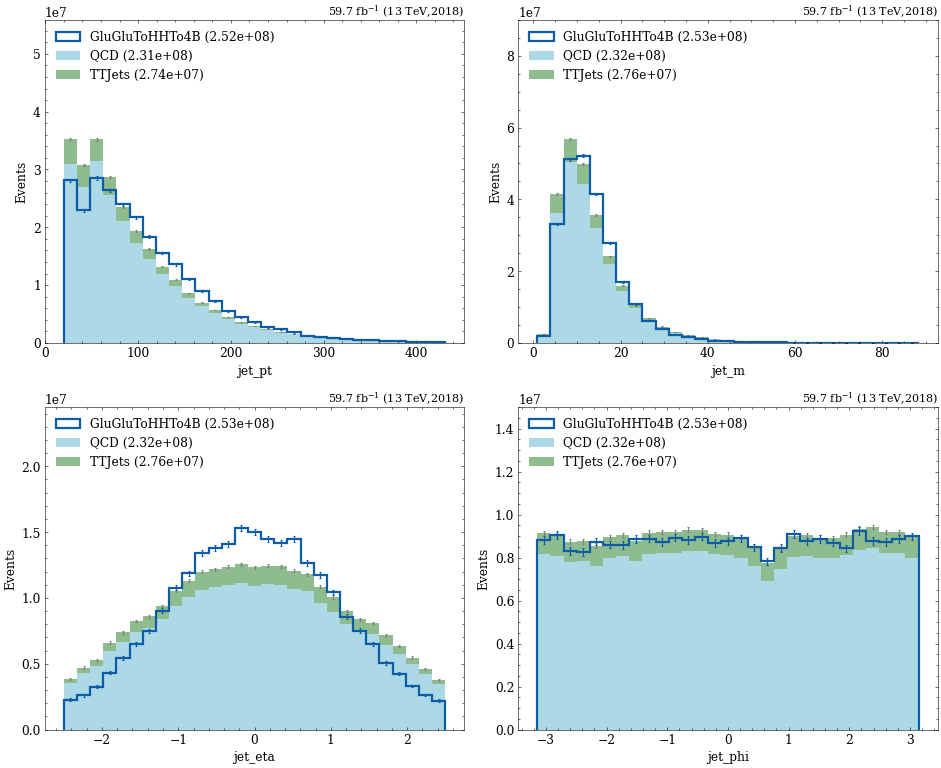

In [38]:
study.quick(
    signal + bkg,
    varlist=['jet_pt','jet_m','jet_eta','jet_phi'],
    # efficiency=True, 
    legend=True,
)

In [20]:
if -1:
    print(" ... Writing trees")

 ... Writing trees


100%|██████████| 1/1 [00:06<00:00,  6.37s/it]


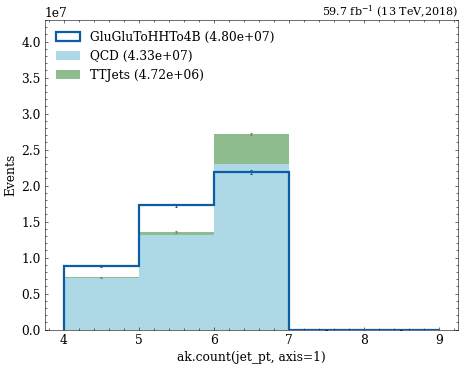

In [39]:
study.quick(
    signal + bkg,
    varlist=['ak.count(jet_pt, axis=1)'],
    binlist=[np.arange(4,10)],
    # efficiency=True, 
    legend=True,
    # cumulative=-1,
)